# Regression models - Linear models

1. Multiple linear regression

Ozone Solar.R    Wind    Temp   Month     Day 
     37       7       0       0       0       0

'data.frame':	153 obs. of  6 variables:
 $ Ozone  : int  41 36 12 18 NA 28 23 19 8 NA ...
 $ Solar.R: int  190 118 149 313 NA NA 299 99 19 194 ...
 $ Wind   : num  7.4 8 12.6 11.5 14.3 14.9 8.6 13.8 20.1 8.6 ...
 $ Temp   : int  67 72 74 62 56 66 65 59 61 69 ...
 $ Month  : int  5 5 5 5 5 5 5 5 5 5 ...
 $ Day    : int  1 2 3 4 5 6 7 8 9 10 ...



Call:
lm(formula = Ozone ~ Solar.R + Wind + Temp + Month + Day, data = airquality)

Coefficients:
(Intercept)      Solar.R         Wind         Temp        Month          Day  
  -64.11632      0.05027     -3.31844      1.89579     -3.03996      0.27388  


,Ozone,Solar.R,Wind,Temp,Month,Day
Ozone,1.000000000,0.34834169,-0.61249658,0.6985414,0.142885168,-0.005189769
Solar.R,0.348341693,1.00000000,-0.12718345,0.2940876,-0.074066683,-0.057753801
Wind,-0.612496576,-0.12718345,1.00000000,-0.4971897,-0.194495804,0.049871017
Temp,0.698541410,0.29408764,-0.49718972,1.0000000,0.403971709,-0.096545800
Month,0.142885168,-0.07406668,-0.19449580,0.4039717,1.000000000,-0.009001079
Day,-0.005189769,-0.05775380,0.04987102,-0.0965458,-0.009001079,1.000000000


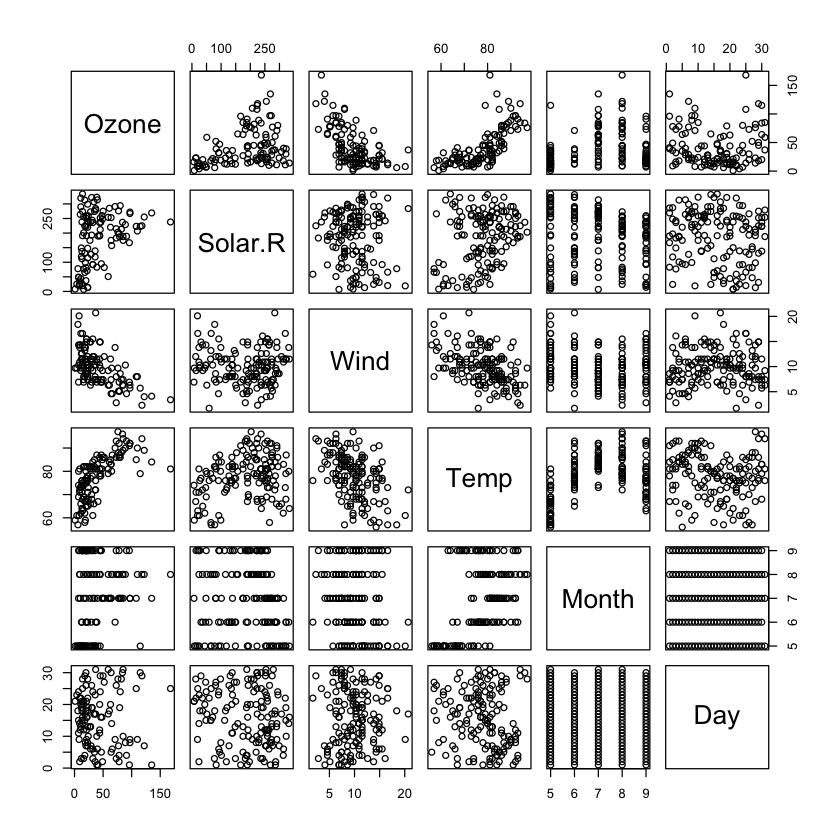

In [1]:
# example

data(airquality)

#How many missing values in each variable
colSums(is.na(airquality))
str(airquality)

# * : all other variables
fit=lm(Ozone ~Solar.R+Wind+Temp+Month+Day, data=airquality)
fit

#scatter plot matrix
pairs(airquality)

dat=na.omit(airquality)

cor(dat)

# Feature interaction

In [2]:
# Feature engineering
# polynomial feature
# I(Wind^2) = Wind^2
fit.2=lm(Ozone ~Solar.R+Wind+I(Wind^2)+I(Wind^3)+Temp+Month+Day, data=airquality)
fit.2

#without interactions, two features
fit.2 = lm(Ozone~Solar.R+Wind, data=airquality)

#interactions(Solar.R*Wind), two features
#airquality$inter.Solor.Wind = airqualit$Solar.R*airquality$Wind

fit.3 = lm(Ozone~Solar.R*Wind, data=airquality)
summary(fit.3)

#interactions(Solar.R*Wind), two features
fit.4= lm(Ozone~Solar.R*Wind*Month, data=airquality)
summary(fit.4)


Call:
lm(formula = Ozone ~ Solar.R + Wind + I(Wind^2) + I(Wind^3) + 
    Temp + Month + Day, data = airquality)

Coefficients:
(Intercept)      Solar.R         Wind    I(Wind^2)    I(Wind^3)         Temp  
   34.29136      0.05186    -23.65594      1.37852     -0.02489      1.65002  
      Month          Day  
   -2.74624      0.35013  



Call:
lm(formula = Ozone ~ Solar.R * Wind, data = airquality)

Residuals:
    Min      1Q  Median      3Q     Max 
-48.694 -17.200  -4.384  12.740  78.218 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  34.467686  17.634602   1.955 0.053246 .  
Solar.R       0.324141   0.083928   3.862 0.000193 ***
Wind         -1.594546   1.508979  -1.057 0.293026    
Solar.R:Wind -0.020279   0.007246  -2.799 0.006089 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 24.16 on 107 degrees of freedom
  (42 observations deleted due to missingness)
Multiple R-squared:  0.487,	Adjusted R-squared:  0.4727 
F-statistic: 33.86 on 3 and 107 DF,  p-value: 1.807e-15



Call:
lm(formula = Ozone ~ Solar.R * Wind * Month, data = airquality)

Residuals:
    Min      1Q  Median      3Q     Max 
-56.511 -17.321  -3.307  12.901  69.640 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)
(Intercept)        73.354880  83.019670   0.884    0.379
Solar.R            -0.302174   0.426066  -0.709    0.480
Wind               -4.364846   6.657808  -0.656    0.514
Month              -6.633092  11.799124  -0.562    0.575
Solar.R:Wind        0.028076   0.035025   0.802    0.425
Solar.R:Month       0.091987   0.061372   1.499    0.137
Wind:Month          0.481245   0.968511   0.497    0.620
Solar.R:Wind:Month -0.007125   0.005138  -1.387    0.169

Residual standard error: 23.96 on 103 degrees of freedom
  (42 observations deleted due to missingness)
Multiple R-squared:  0.5144,	Adjusted R-squared:  0.4814 
F-statistic: 15.59 on 7 and 103 DF,  p-value: 8.616e-14


In [3]:
# Feature selection
fit.5 = lm(Ozone~ Solar.R+ Wind + I(Wind^2) + I(Wind^3) + Temp + Month ,data=airquality)
fit.5


#Too many variables, which variables should be included.


Call:
lm(formula = Ozone ~ Solar.R + Wind + I(Wind^2) + I(Wind^3) + 
    Temp + Month, data = airquality)

Coefficients:
(Intercept)      Solar.R         Wind    I(Wind^2)    I(Wind^3)         Temp  
   39.86703      0.05097    -23.19692      1.34622     -0.02426      1.62335  
      Month  
   -2.68960  


# Model selection using step function in R linear models 

In [4]:
dat=na.omit(airquality)

#Forward selection
#empty model without any variable, then adding one by one until sufficient number of variables
fit0 = lm(Ozone ~ 1, data=dat)

#A model includes all other variables 
fit= lm(Ozone~., data=dat)

#Stepwise forward selection
step(fit0, direction='forward', scope=formula(fit), trace=1)

#Backward elimination
step(fit, direction='backward', scope=formula(fit0), trace=0)

#Bidirectional selection
#starting from the full model with all variables
step(fit0, direction='both', scope=formula(fit), trace=0)


# Best subsets regression
#only works when the number of varibles is small

Start:  AIC=779.07
Ozone ~ 1

          Df Sum of Sq    RSS    AIC
+ Temp     1     59434  62367 706.77
+ Wind     1     45694  76108 728.87
+ Solar.R  1     14780 107022 766.71
+ Month    1      2487 119315 778.78
<none>                 121802 779.07
+ Day      1         3 121799 781.07

Step:  AIC=706.77
Ozone ~ Temp

          Df Sum of Sq   RSS    AIC
+ Wind     1   11378.5 50989 686.41
+ Month    1    2824.7 59543 703.63
+ Solar.R  1    2723.1 59644 703.82
<none>                 62367 706.77
+ Day      1     476.5 61891 707.92

Step:  AIC=686.41
Ozone ~ Temp + Wind

          Df Sum of Sq   RSS    AIC
+ Solar.R  1   2986.17 48003 681.71
+ Month    1   2734.79 48254 682.29
<none>                 50989 686.41
+ Day      1    486.59 50502 687.35

Step:  AIC=681.71
Ozone ~ Temp + Wind + Solar.R

        Df Sum of Sq   RSS    AIC
+ Month  1   1701.18 46302 679.71
<none>               48003 681.71
+ Day    1    564.53 47438 682.40

Step:  AIC=679.71
Ozone ~ Temp + Wind + Solar.R + Month


Call:
lm(formula = Ozone ~ Temp + Wind + Solar.R + Month, data = dat)

Coefficients:
(Intercept)         Temp         Wind      Solar.R        Month  
   -58.0538       1.8709      -3.3165       0.0496      -2.9916  



Call:
lm(formula = Ozone ~ Solar.R + Wind + Temp + Month, data = dat)

Coefficients:
(Intercept)      Solar.R         Wind         Temp        Month  
   -58.0538       0.0496      -3.3165       1.8709      -2.9916  



Call:
lm(formula = Ozone ~ Temp + Wind + Solar.R + Month, data = dat)

Coefficients:
(Intercept)         Temp         Wind      Solar.R        Month  
   -58.0538       1.8709      -3.3165       0.0496      -2.9916  


In [5]:
# k-Fold Cross-Validation, k = 8

library(caret)
cv.control = trainControl (method = "cv", number = 8)

#Linear regression
fit.cv = train(Ozone ~ 
               Temp + Wind + Solar.R + Month, 
               data = dat, method ="lm",trControl=cv.control) 


fit.cv

#The best model selected
fit.cv$finalModel


#Lm , different results.

Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.2.3"
Loading required package: lattice



Linear Regression 

111 samples
  4 predictor

No pre-processing
Resampling: Cross-Validated (8 fold) 
Summary of sample sizes: 96, 98, 97, 97, 97, 97, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  20.70918  0.6729349  15.78172

Tuning parameter 'intercept' was held constant at a value of TRUE


Call:
lm(formula = .outcome ~ ., data = dat)

Coefficients:
(Intercept)         Temp         Wind      Solar.R        Month  
   -58.0538       1.8709      -3.3165       0.0496      -2.9916  


# Multicollinearity 

- Multicollinearity is a statistical concept where several independent variables in a model are correlated. 
- VIF : The variance inflation factor(VIF) can detect multicollinearity
- A vif over 5 could be problem, >10 sholud be remedied.

In [6]:
dat=na.omit(airquality)

In [7]:
library(car)

fit = lm(Ozone~., data=dat)
vif = vif(fit)
round(vif,3)

Loading required package: carData



Solar.R    Wind    Temp   Month     Day 
  1.152   1.329   1.722   1.257   1.011

In [8]:
#Is there Multicollinearity issue?

#A model with many interaction terms
fit.2 = lm(Ozone ~ Temp*Wind*Solar.R*Month+Day,data=dat)
vif = vif(fit.2)
round(vif,3)

#vif(s) of some variables are huge ==> Multicollinearity 

there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif



Temp                    Wind                 Solar.R 
               2839.541               12461.400               39258.040 
                  Month                     Day               Temp:Wind 
               6178.692                   1.133               14253.948 
           Temp:Solar.R            Wind:Solar.R              Temp:Month 
              53374.227               48749.634               13218.279 
             Wind:Month           Solar.R:Month       Temp:Wind:Solar.R 
              14784.321               42829.869               58151.210 
        Temp:Wind:Month      Temp:Solar.R:Month      Wind:Solar.R:Month 
              18680.832               59323.059               46150.895 
Temp:Wind:Solar.R:Month 
              55123.414

In [9]:
fit.2


Call:
lm(formula = Ozone ~ Temp * Wind * Solar.R * Month + Day, data = dat)

Coefficients:
            (Intercept)                     Temp                     Wind  
             -4.967e+02                9.418e+00                5.516e+01  
                Solar.R                    Month                      Day  
              5.780e-01                3.681e+01                2.364e-01  
              Temp:Wind             Temp:Solar.R             Wind:Solar.R  
             -9.709e-01               -1.479e-02               -1.210e-01  
             Temp:Month               Wind:Month            Solar.R:Month  
             -8.144e-01               -5.677e+00               -8.332e-02  
      Temp:Wind:Solar.R          Temp:Wind:Month       Temp:Solar.R:Month  
              2.386e-03                1.046e-01                2.344e-03  
     Wind:Solar.R:Month  Temp:Wind:Solar.R:Month  
              1.544e-02               -3.242e-04  


# Partial least squares 

- Partial Least Squares (PLS) is a regression technique particularly useful when there is a large number of predictors, or when those predictors are highly correlated. 
- Handles multicollinearity

- PLS is a powerful regression technique that reduces the dimensionality of data, making it ideal for datasets with many predictors or highly correlated variables. It simultaneously performs dimensionality reduction and prediction, making it both efficient and effective in various modeling scenarios.


In [10]:
library(pls) 
str(mtcars)


Attaching package: 'pls'


The following object is masked from 'package:caret':

    R2


The following object is masked from 'package:stats':

    loadings




'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


In [11]:
fit=lm(mpg~., data=mtcars)
vif(fit)
step(fit, trace=0)
#There are some multicollinearity issue.
library(caret) 


cyl      disp        hp      drat        wt      qsec        vs        am 
15.373833 21.620241  9.832037  3.374620 15.164887  7.527958  4.965873  4.648487 
     gear      carb 
 5.357452  7.908747


Call:
lm(formula = mpg ~ wt + qsec + am, data = mtcars)

Coefficients:
(Intercept)           wt         qsec           am  
      9.618       -3.917        1.226        2.936  


Data: 	X dimension: 32 10 
	Y dimension: 32 1
Fit method: kernelpls
Number of components considered: 10

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           6.123    2.808    2.866    2.908    3.739    4.134    4.146
adjCV        6.123    2.790    2.839    2.880    3.652    4.020    4.033
       7 comps  8 comps  9 comps  10 comps
CV       4.162    4.133    4.132     4.132
adjCV    4.048    4.022    4.020     4.021

TRAINING: % variance explained
     1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X      57.58    67.65    89.94    91.48    92.82    94.00    95.86    97.14
mpg    83.18    85.39    85.75    86.38    86.72    86.85    86.89    86.90
     9 comps  10 comps
X      98.51     100.0
mpg    86.90      86.9


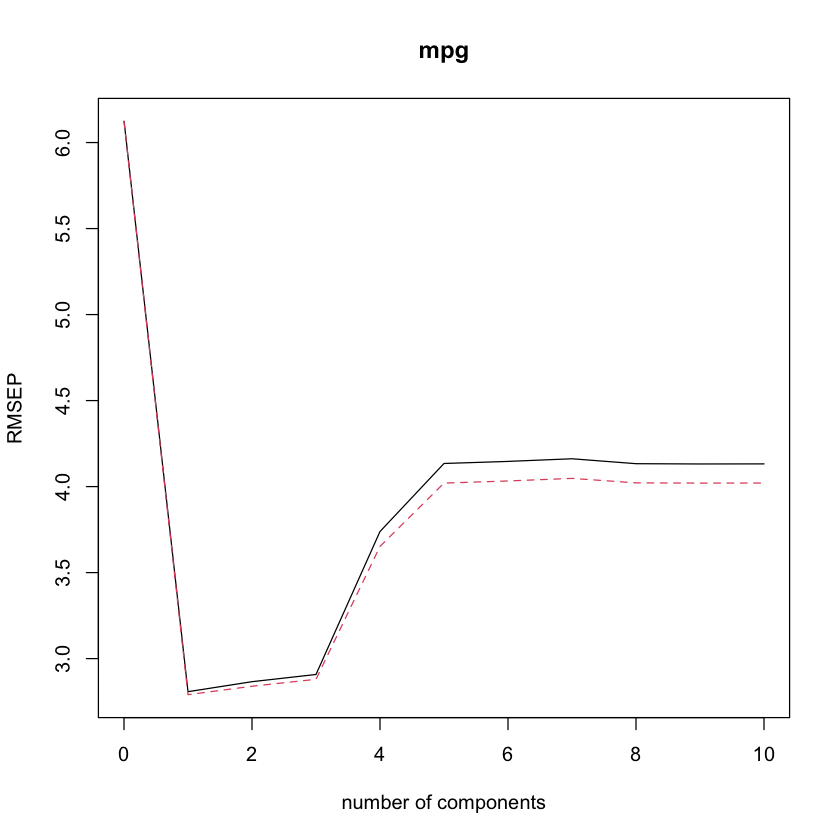

In [12]:
#make the result reproducible
set.seed(526)

#Fit PCR model
#scale=TRUE: variables scaled to have a mean of 0 and a standard deviation of
#validation="CV", k-fold cross-validation to evaluate the performance of the
fit.pls = plsr(mpg~ ., data=mtcars, scale=TRUE, validation="CV")
summary(fit.pls)
#RMSEP against the number of PLS components
validationplot(fit.pls)

#Variance explained
#According to the validaiton plot, we may use just 1 PLS component in the mode

In [13]:
library(caret)
#Repeated k-fold cross valiation , with 5 repeats
#tuning paramter : the number of components (hyperparamerter)
#PLS has one tuning parameter to train
#tuneLength = 8 : there are 8 possible tuning parameters
set.seed(143)


ctrl = trainControl(method = "repeatedcv", repeats = 5)
pls.fit = train(mpg ~ ., data = mtcars, method = "pls",
preProc = c("center", "scale"), tuneLength = 8, trControl = ctrl)
                
                
#Find the best tuning parameter
pls.fit$bestTune
                
                
#summarize the best model selected
summary(pls.fit$finalModel)
#The model using 1 PLS component is selected. About 83.18% information in mpg

,ncomp
,<dbl>
1,1


Data: 	X dimension: 32 10 
	Y dimension: 32 1
Fit method: oscorespls
Number of components considered: 1
TRAINING: % variance explained
          1 comps
X           57.58
.outcome    83.18


In [14]:
#Create a training set and a test set
#creating training data as 75% of the dataset
train.index = createDataPartition(mtcars$mpg, p = 0.75, list = FALSE)

#generating training dataset
#from the random_sample
training.dat = mtcars[train.index, ]

#generating testing dataset
#from rows which are not included in training set
testing.dat = mtcars[-train.index, ]
set.seed(143)


# 4 folds cross validation
ctrl = trainControl(method = "cv", number = 4)

pls.fit.1 = train( mpg ~., data = training.dat, method = "pls",
                  preProc = c("center", "scale"), tuneLength = 8,
                  trControl = ctrl)
                
                
#To make prediction using the selected model with 1 pls component
new.dat = testing.dat
fit.pred = predict(fit.pls, new.dat, ncomp=1)
fit.pred
#The error

, , 1 comps

                        mpg
Hornet 4 Drive     20.57199
Hornet Sportabout  15.61183
Merc 450SL         15.56450
Cadillac Fleetwood 11.99107
Honda Civic        28.89875
Ferrari Dino       20.23325
Maserati Bora      14.41920

[1] 2.6630388 1.6318820 1.4082920 0.9416416


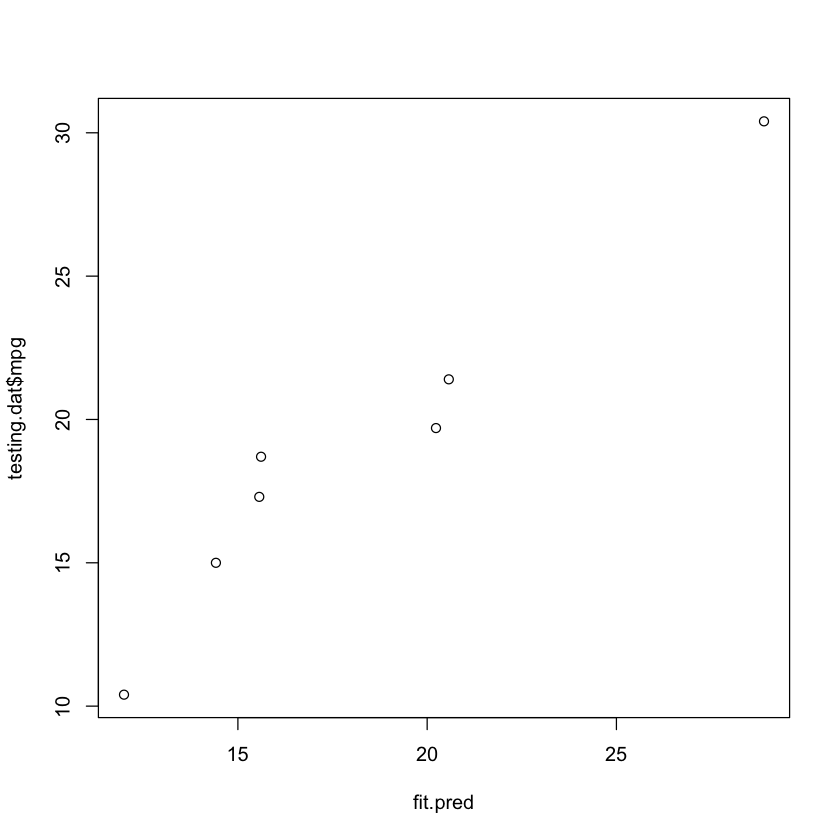

In [15]:
#plot of the predicted values against the true values
plot(fit.pred,testing.dat$mpg)

#the difference between predicted values and the real observed values

pd.error = fit.pred-testing.dat$mpg

MSE.testing = mean(pd.error^2)
RMSE.testing = sqrt(mean(pd.error^2))
MAD.testing = mean(abs(pd.error))

#R^2
Rsq.Testing= (cor(fit.pred,testing.dat$mpg))^2

print(c(MSE.testing,RMSE.testing, MAD.testing,Rsq.Testing))